<h1 style="color:red;"><strong>1. Look at the big Picture</h1>

## **1.1 Frame the Problems**

* **What's the business objective**

The development of supermarkets in most densely populated cities is increasingly growing, leading to a fiercely competitive market. In this context, supermarkets must continuously improve their services and business strategies to attract and retain customers. The mentioned dataset is a collection of historical sales information from a supermarket company, recorded at three different branches over a three-month period. This data includes detailed sales figures by day, by branch, and also encompasses other related factors such as product type, selling price, customer gender, customer tier, and customer feedback. Analyzing this dataset can provide insights into customer shopping trends. From there, the company can make strategic decisions to optimize revenue and enhance the customer experience.

* **How does the company expect to use and benefit from the model?**

Analyzing this dataset can provide deep insights into customer shopping trends, helping the company identify consumer patterns and preferences. With this crucial information, the company can make informed strategic decisions to optimize revenue, enhance business efficiency, and comprehensively improve the customer experience.



## **1.2 Chose performance measure (Loss)**


### **1.2.1 Regression**
* RMSE
* MAE
* MSE, 
* RMSLE
* MAPE
* SMAPE

### **1.2.2 Classification**
* Binary Cross Entropy 
* Sparse Categorical Cross Entropy
* Categorial Cross Entropy

## **1.3 Chose performance measure (Metrics)**

### **1.3.1 Regression**
* Adjusted r^2

### **1.3.2 Classification**
* AUC
* Accuracy
* False Positive
* False Negative
* F1 Score
* Confusion matrix

## **1.4 Check the Assumptions** 

<h1 style="color:red;"><strong>2. Get the Data</h1>

In [1]:
# import libraries

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
#-----------------------------
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\PHUONG UYEN\AppData\Local\Temp\ipykernel_10228\70295732.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("data_supermarket.csv")

In [3]:
# Take a look at the top 5 rows
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00,Ewallet,5.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  Rating         1000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


In [5]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,6.97270
std,26.494628,2.923431,11.708825,245.885335,1.71858
min,10.080000,1.000000,0.508500,10.678500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,5.50000
50%,55.230000,5.000000,12.088000,253.848000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,10.00000


<h1 style="color:red;"><strong>3. Data Cleaning (General)</h1>

## **3.1 Formating**

In [6]:
df.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08:00,Ewallet,9.1


### **3.1.1 Format column names**

In [7]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'Rating'],
      dtype='object')

In [8]:
def rename_columns(df):
   # convert form camel case to snake case
   df.columns = (df.columns
                  .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                  .str.lower()
               )
   # convert " " to _
   df.columns = df.columns.str.replace(' ', '_')
   return df

In [9]:
df = rename_columns(df)

In [10]:
df.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5%', 'total', 'date',
       'time', 'payment', 'rating'],
      dtype='object')

In [11]:
df.head(1)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08:00,Ewallet,9.1


In [12]:
df['date']

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: date, Length: 1000, dtype: object

### **3.1.2 Format Datatypes**
After we format all the data body and columns, let's format the data types

In [13]:
df.dtypes

invoice_id        object
branch            object
city              object
customer_type     object
gender            object
product_line      object
unit_price       float64
quantity           int64
tax_5%           float64
total            float64
date              object
time              object
payment           object
rating           float64
dtype: object

In [14]:
# Concatenate date and time columns into a single column and convert to datetime
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# # Extract year, month, day, and hour from the datetime column
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

In [15]:
# # Convert date column to datetime.date
# df['date'] = pd.to_datetime(df['date']).dt.datetime

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   invoice_id     1000 non-null   object        
 1   branch         1000 non-null   object        
 2   city           1000 non-null   object        
 3   customer_type  1000 non-null   object        
 4   gender         1000 non-null   object        
 5   product_line   1000 non-null   object        
 6   unit_price     1000 non-null   float64       
 7   quantity       1000 non-null   int64         
 8   tax_5%         1000 non-null   float64       
 9   total          1000 non-null   float64       
 10  date           1000 non-null   object        
 11  time           1000 non-null   object        
 12  payment        1000 non-null   object        
 13  rating         1000 non-null   float64       
 14  datetime       1000 non-null   datetime64[ns]
 15  year           1000 no

### **3.1.3 Format data body**

## **3.2 Drop duplicates rows**

In [17]:
df.drop_duplicates(inplace=True)

## **3.3 Reorder Columns**

In [18]:
df.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5%', 'total', 'date',
       'time', 'payment', 'rating', 'datetime', 'year', 'month', 'day',
       'hour'],
      dtype='object')

In [19]:
df  = df[['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line','payment', 'date','time', 'datetime', 'year', 'month', 'day', 'hour',
        'unit_price', 'quantity', 'tax_5%', 'total',
       'rating']]

In [20]:
df.head(3)

,invoice_id,branch,city,customer_type,gender,product_line,payment,date,time,datetime,year,month,day,hour,unit_price,quantity,tax_5%,total,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,Ewallet,1/5/2019,13:08:00,2019-01-05 13:08:00,2019,1,5,13,74.69,7,26.1415,548.9715,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,Cash,3/8/2019,10:29:00,2019-03-08 10:29:00,2019,3,8,10,15.28,5,3.8200,80.2200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,Credit card,3/3/2019,13:23:00,2019-03-03 13:23:00,2019,3,3,13,46.33,7,16.2155,340.5255,7.4


<h1 style="color:red;"><strong>4. Attribute Combination</h1>

In [21]:
df['revenue'] = df['quantity'] * df['unit_price']

In [22]:
df.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'payment', 'date', 'time', 'datetime', 'year', 'month',
       'day', 'hour', 'unit_price', 'quantity', 'tax_5%', 'total', 'rating',
       'revenue'],
      dtype='object')

In [23]:
df = df[['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'payment', 'date', 'time', 'datetime', 'year', 'month',
       'day', 'hour', 'unit_price', 'quantity', 'revenue','tax_5%', 'rating']]

In [24]:
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,payment,date,time,datetime,year,month,day,hour,unit_price,quantity,revenue,tax_5%,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,Ewallet,1/5/2019,13:08:00,2019-01-05 13:08:00,2019,1,5,13,74.69,7,522.83,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,Cash,3/8/2019,10:29:00,2019-03-08 10:29:00,2019,3,8,10,15.28,5,76.40,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,Credit card,3/3/2019,13:23:00,2019-03-03 13:23:00,2019,3,3,13,46.33,7,324.31,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,Ewallet,1/27/2019,20:33:00,2019-01-27 20:33:00,2019,1,27,20,58.22,8,465.76,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,Ewallet,2/8/2019,10:37:00,2019-02-08 10:37:00,2019,2,8,10,86.31,7,604.17,30.2085,5.3


<h1 style="color:red;"><strong> 5. EDA</h1>

In [25]:
df.apply(lambda col: col.unique())

invoice_id       [750-67-8428, 226-31-3081, 631-41-3108, 123-19...
branch                                                   [A, C, B]
city                                 [Yangon, Naypyitaw, Mandalay]
customer_type                                     [Member, Normal]
gender                                              [Female, Male]
product_line     [Health and beauty, Electronic accessories, Ho...
payment                               [Ewallet, Cash, Credit card]
date             [1/5/2019, 3/8/2019, 3/3/2019, 1/27/2019, 2/8/...
time             [13:08:00, 10:29:00, 13:23:00, 20:33:00, 10:37...
datetime         [2019-01-05 13:08:00, 2019-03-08 10:29:00, 201...
year                                                        [2019]
month                                                    [1, 3, 2]
day              [5, 8, 3, 27, 25, 24, 10, 20, 6, 9, 12, 7, 29,...
hour                  [13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12]
unit_price       [74.69, 15.28, 46.33, 58.22, 86.31, 85.39, 68

In [26]:
df.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'payment', 'date', 'time', 'datetime', 'year', 'month',
       'day', 'hour', 'unit_price', 'quantity', 'revenue', 'tax_5%', 'rating'],
      dtype='object')

In [74]:
cat_attribs = ['branch', 'city', 'customer_type', 'gender','product_line', 'payment']
bin_attribs = [col for col in df.columns if len(df[col].unique()) == 2 or len(df[col].unique()) == 1]
num_attribs = [col for col in df.columns if col not in cat_attribs and col not in bin_attribs and col != 'id' and col not in ['invoice_id','date','time','datetime']]


## **5.1 Univariate**

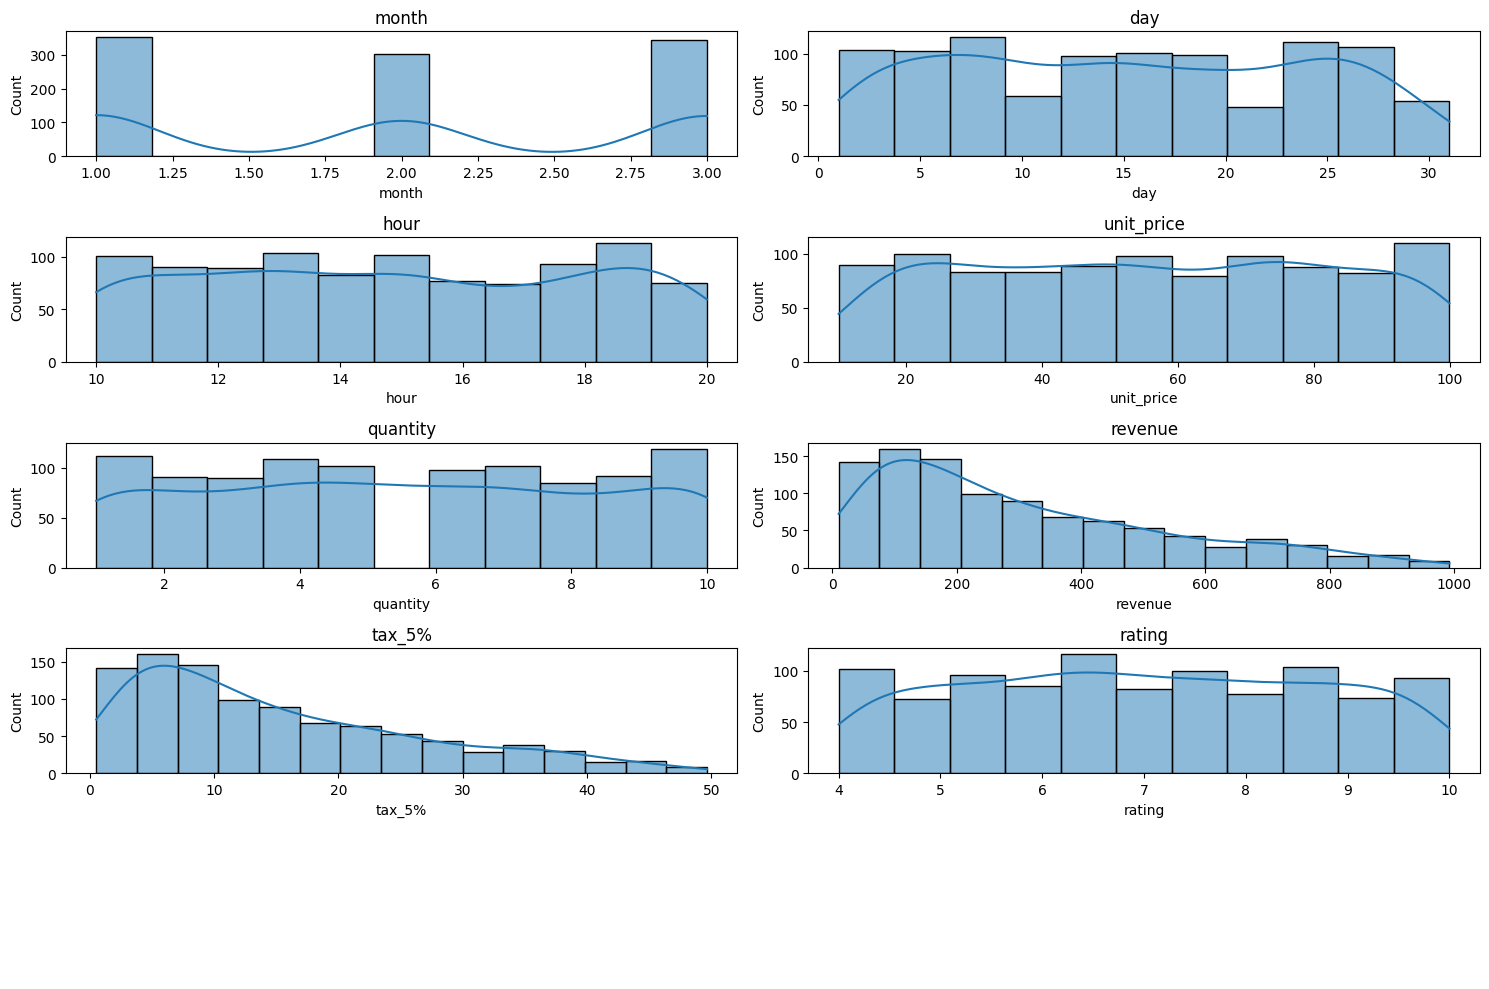

In [28]:
# Define the number of rows and columns for subplots
num_rows = 5
num_cols = (len(num_attribs) + num_rows - 1) // num_rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array to iterate over numerical attributes
axes = axes.flatten()

# Iterate over numerical attributes and plot histograms
for i, column in enumerate(num_attribs):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(column)

# Hide empty subplots
for j in range(i+1, num_rows*num_cols):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

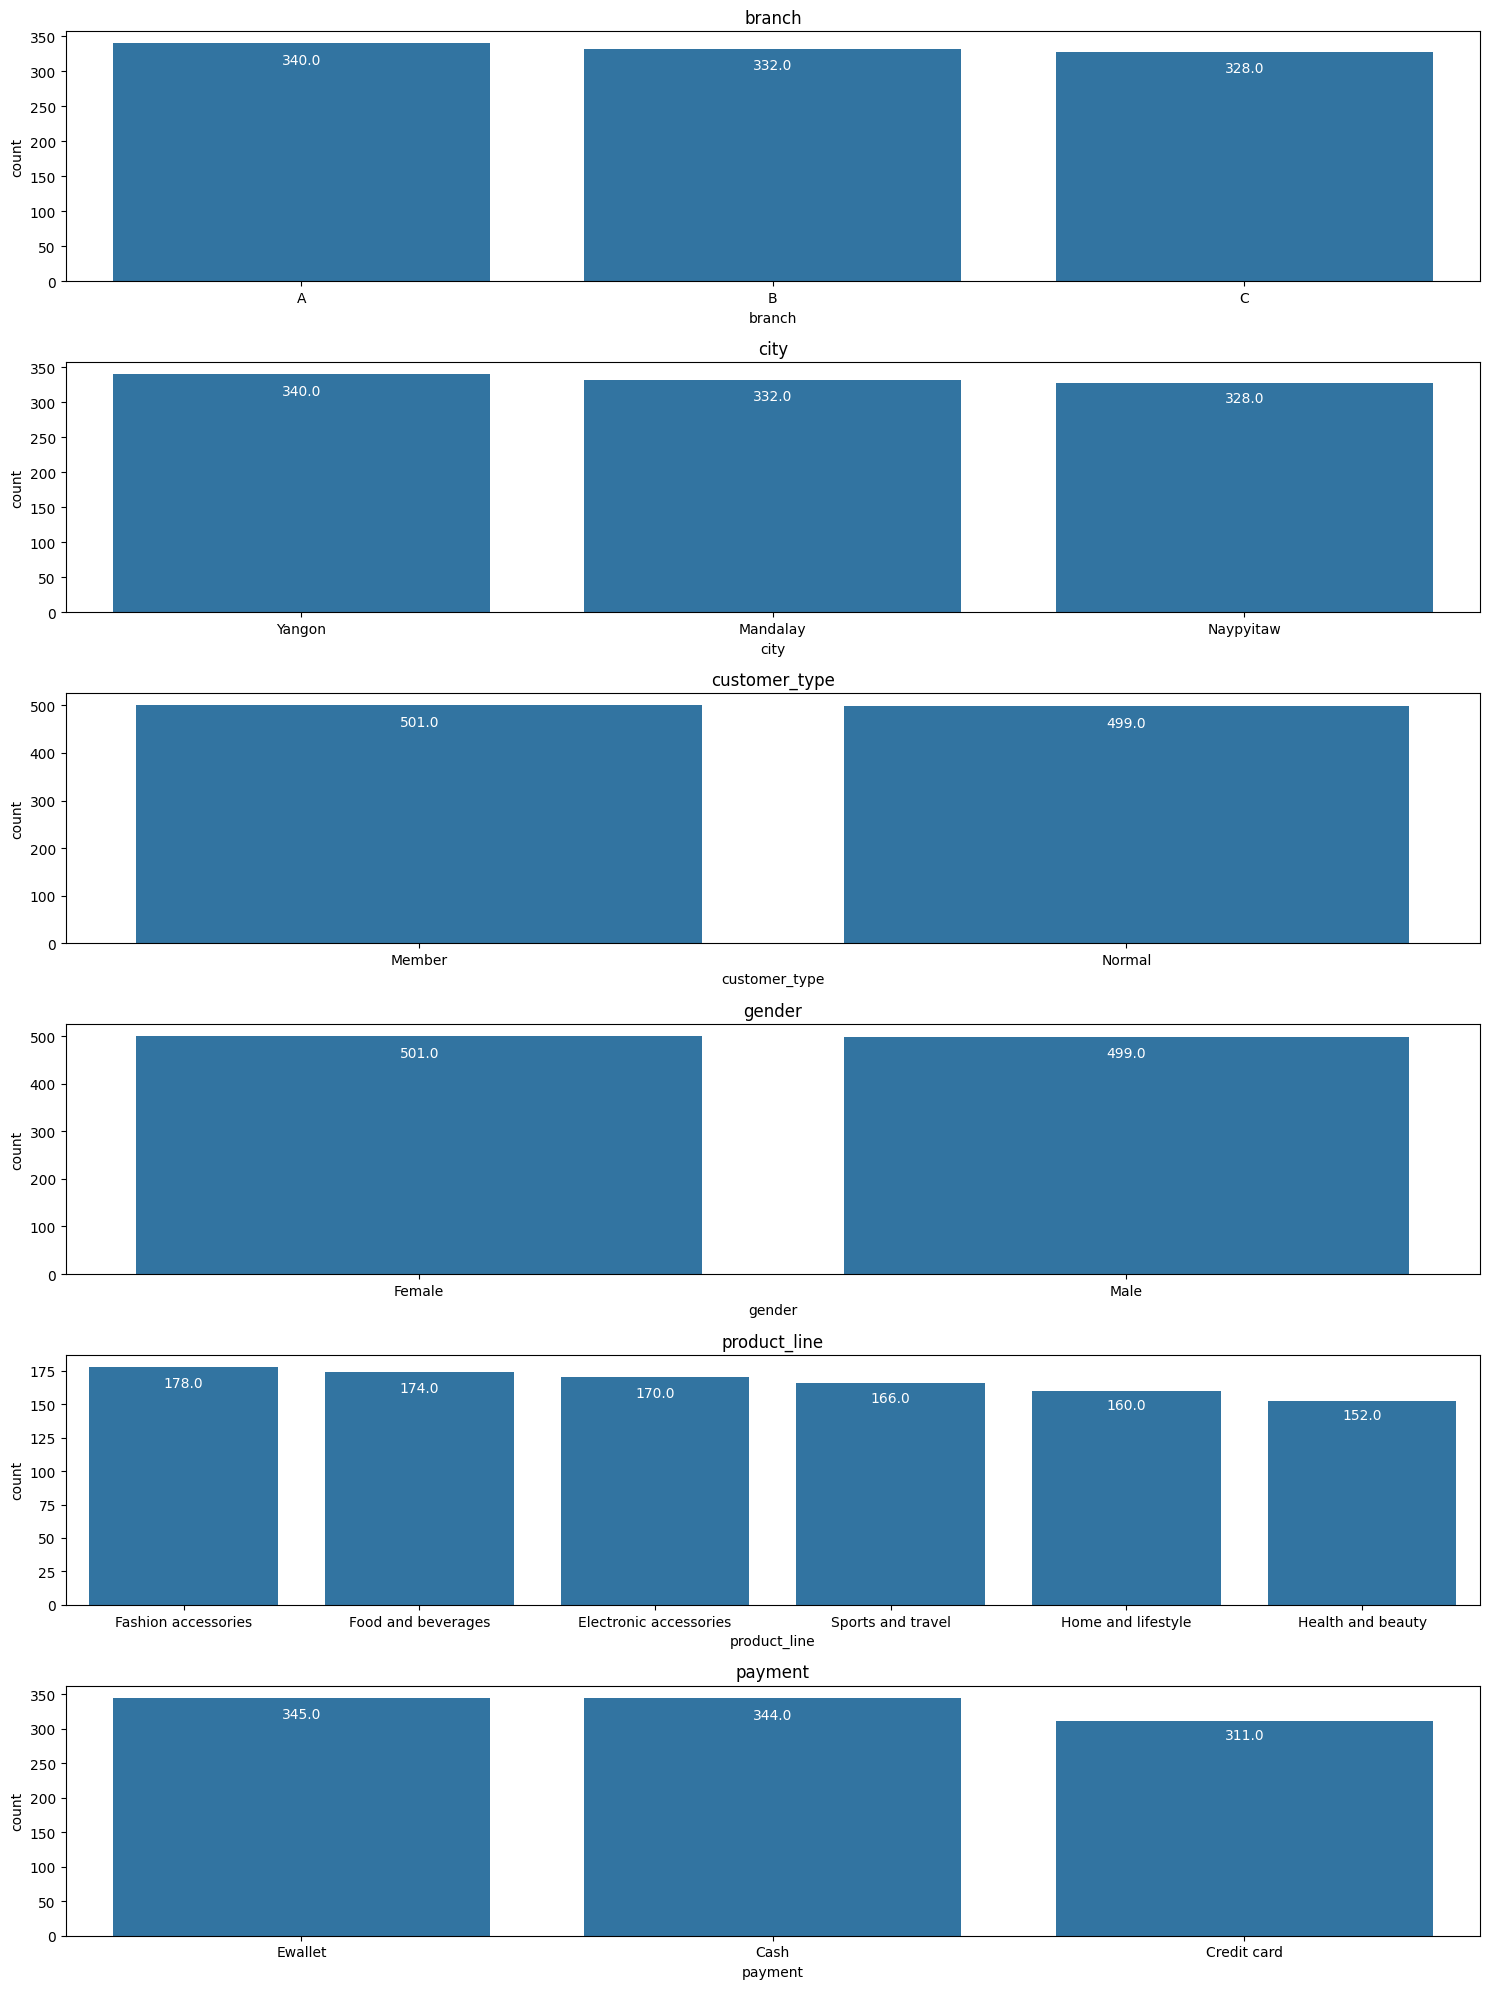

In [29]:
# Define the number of rows and columns for subplots
num_rows = len(cat_attribs)
num_cols = (len(cat_attribs) + num_rows - 1) // num_rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

# Flatten the axes array to iterate over binary attributes
axes = axes.flatten()

# Iterate over binary attributes and plot bar graphs
for i, column in enumerate(cat_attribs):
    # Order the bars by count
    order = df[column].value_counts().index
    ax = sns.countplot(x=df[column], ax=axes[i], order=order)
    axes[i].set_title(column)
    
    # Add labels inside the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height - (height * 0.1)), 
                    ha='center', va='bottom', 
                    color='white', fontsize=10)

# Hide empty subplots
for j in range(i+1, num_rows*num_cols):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

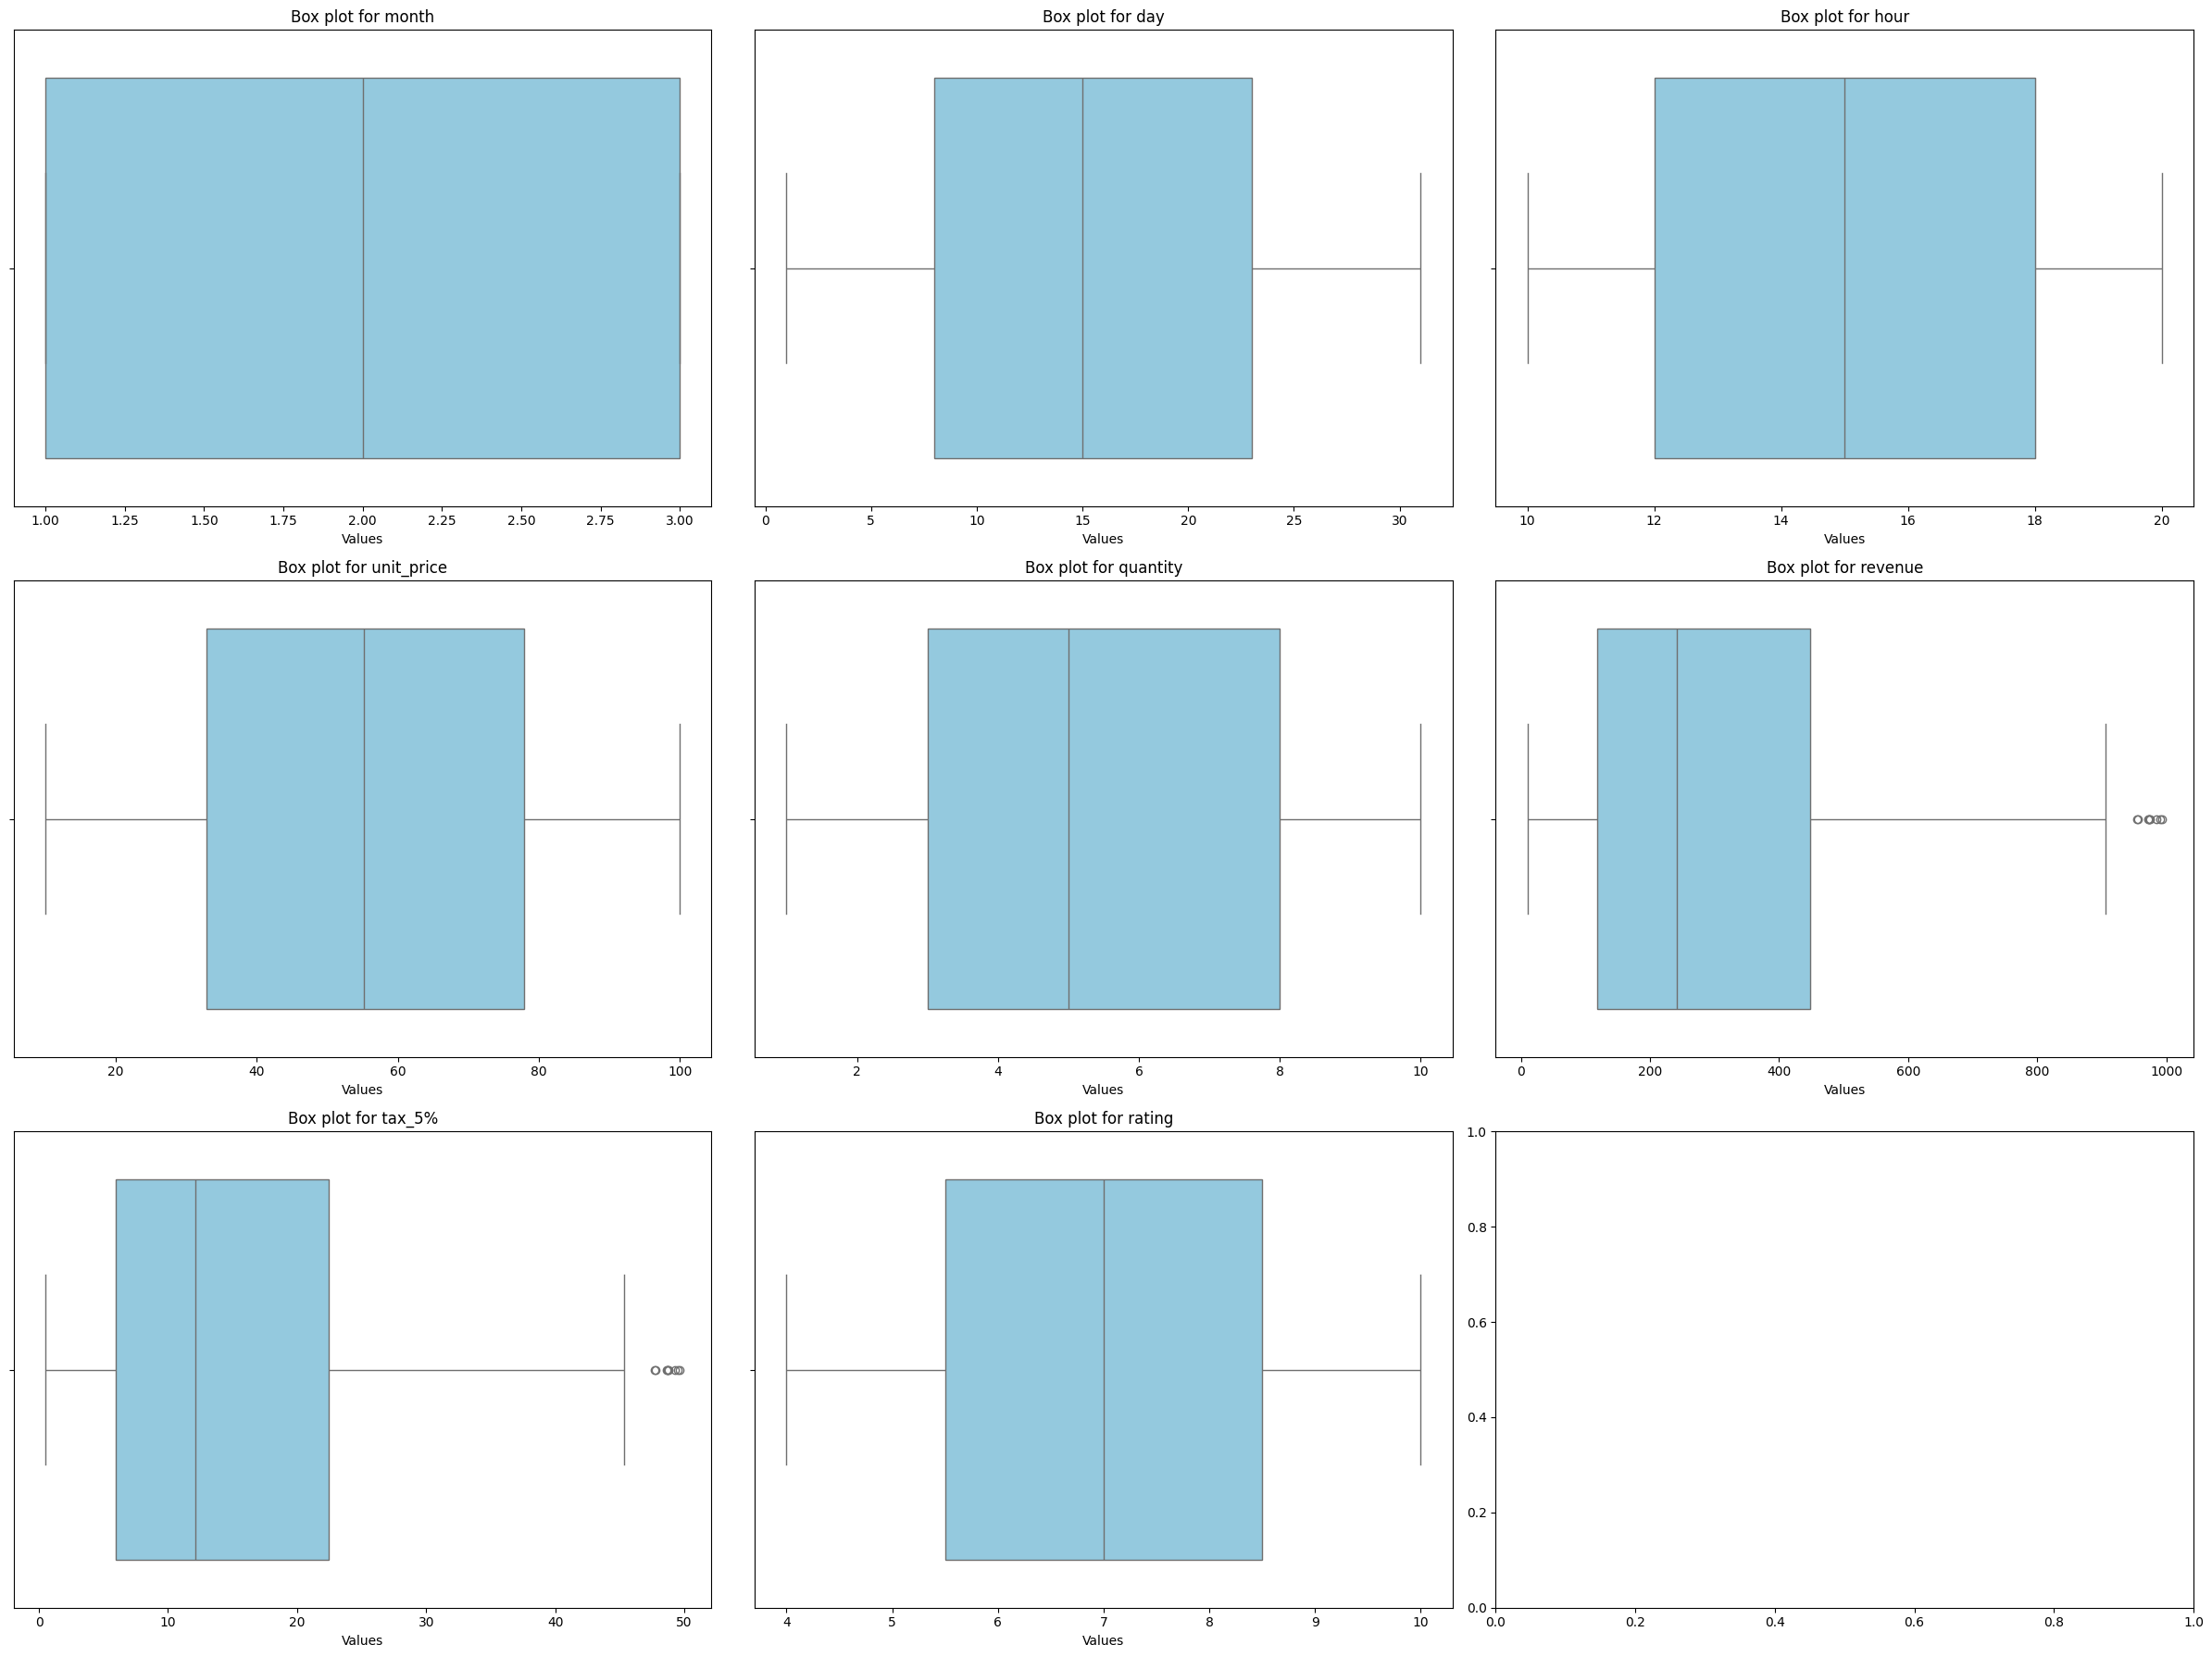

In [30]:
num_rows = 3
num_cols = len(num_attribs) // num_rows + (len(num_attribs) % num_rows > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))
axes = axes.ravel()  # Flatten the axes array

for i, col in enumerate(num_attribs):
    ax = axes[i]
    sns.boxplot(x=df[col], ax=ax, color='skyblue')  # Use seaborn's boxplot function
    ax.set_title(f'Box plot for {col}')
    ax.set_xlabel('Values')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

## **5.2 Bivariate**

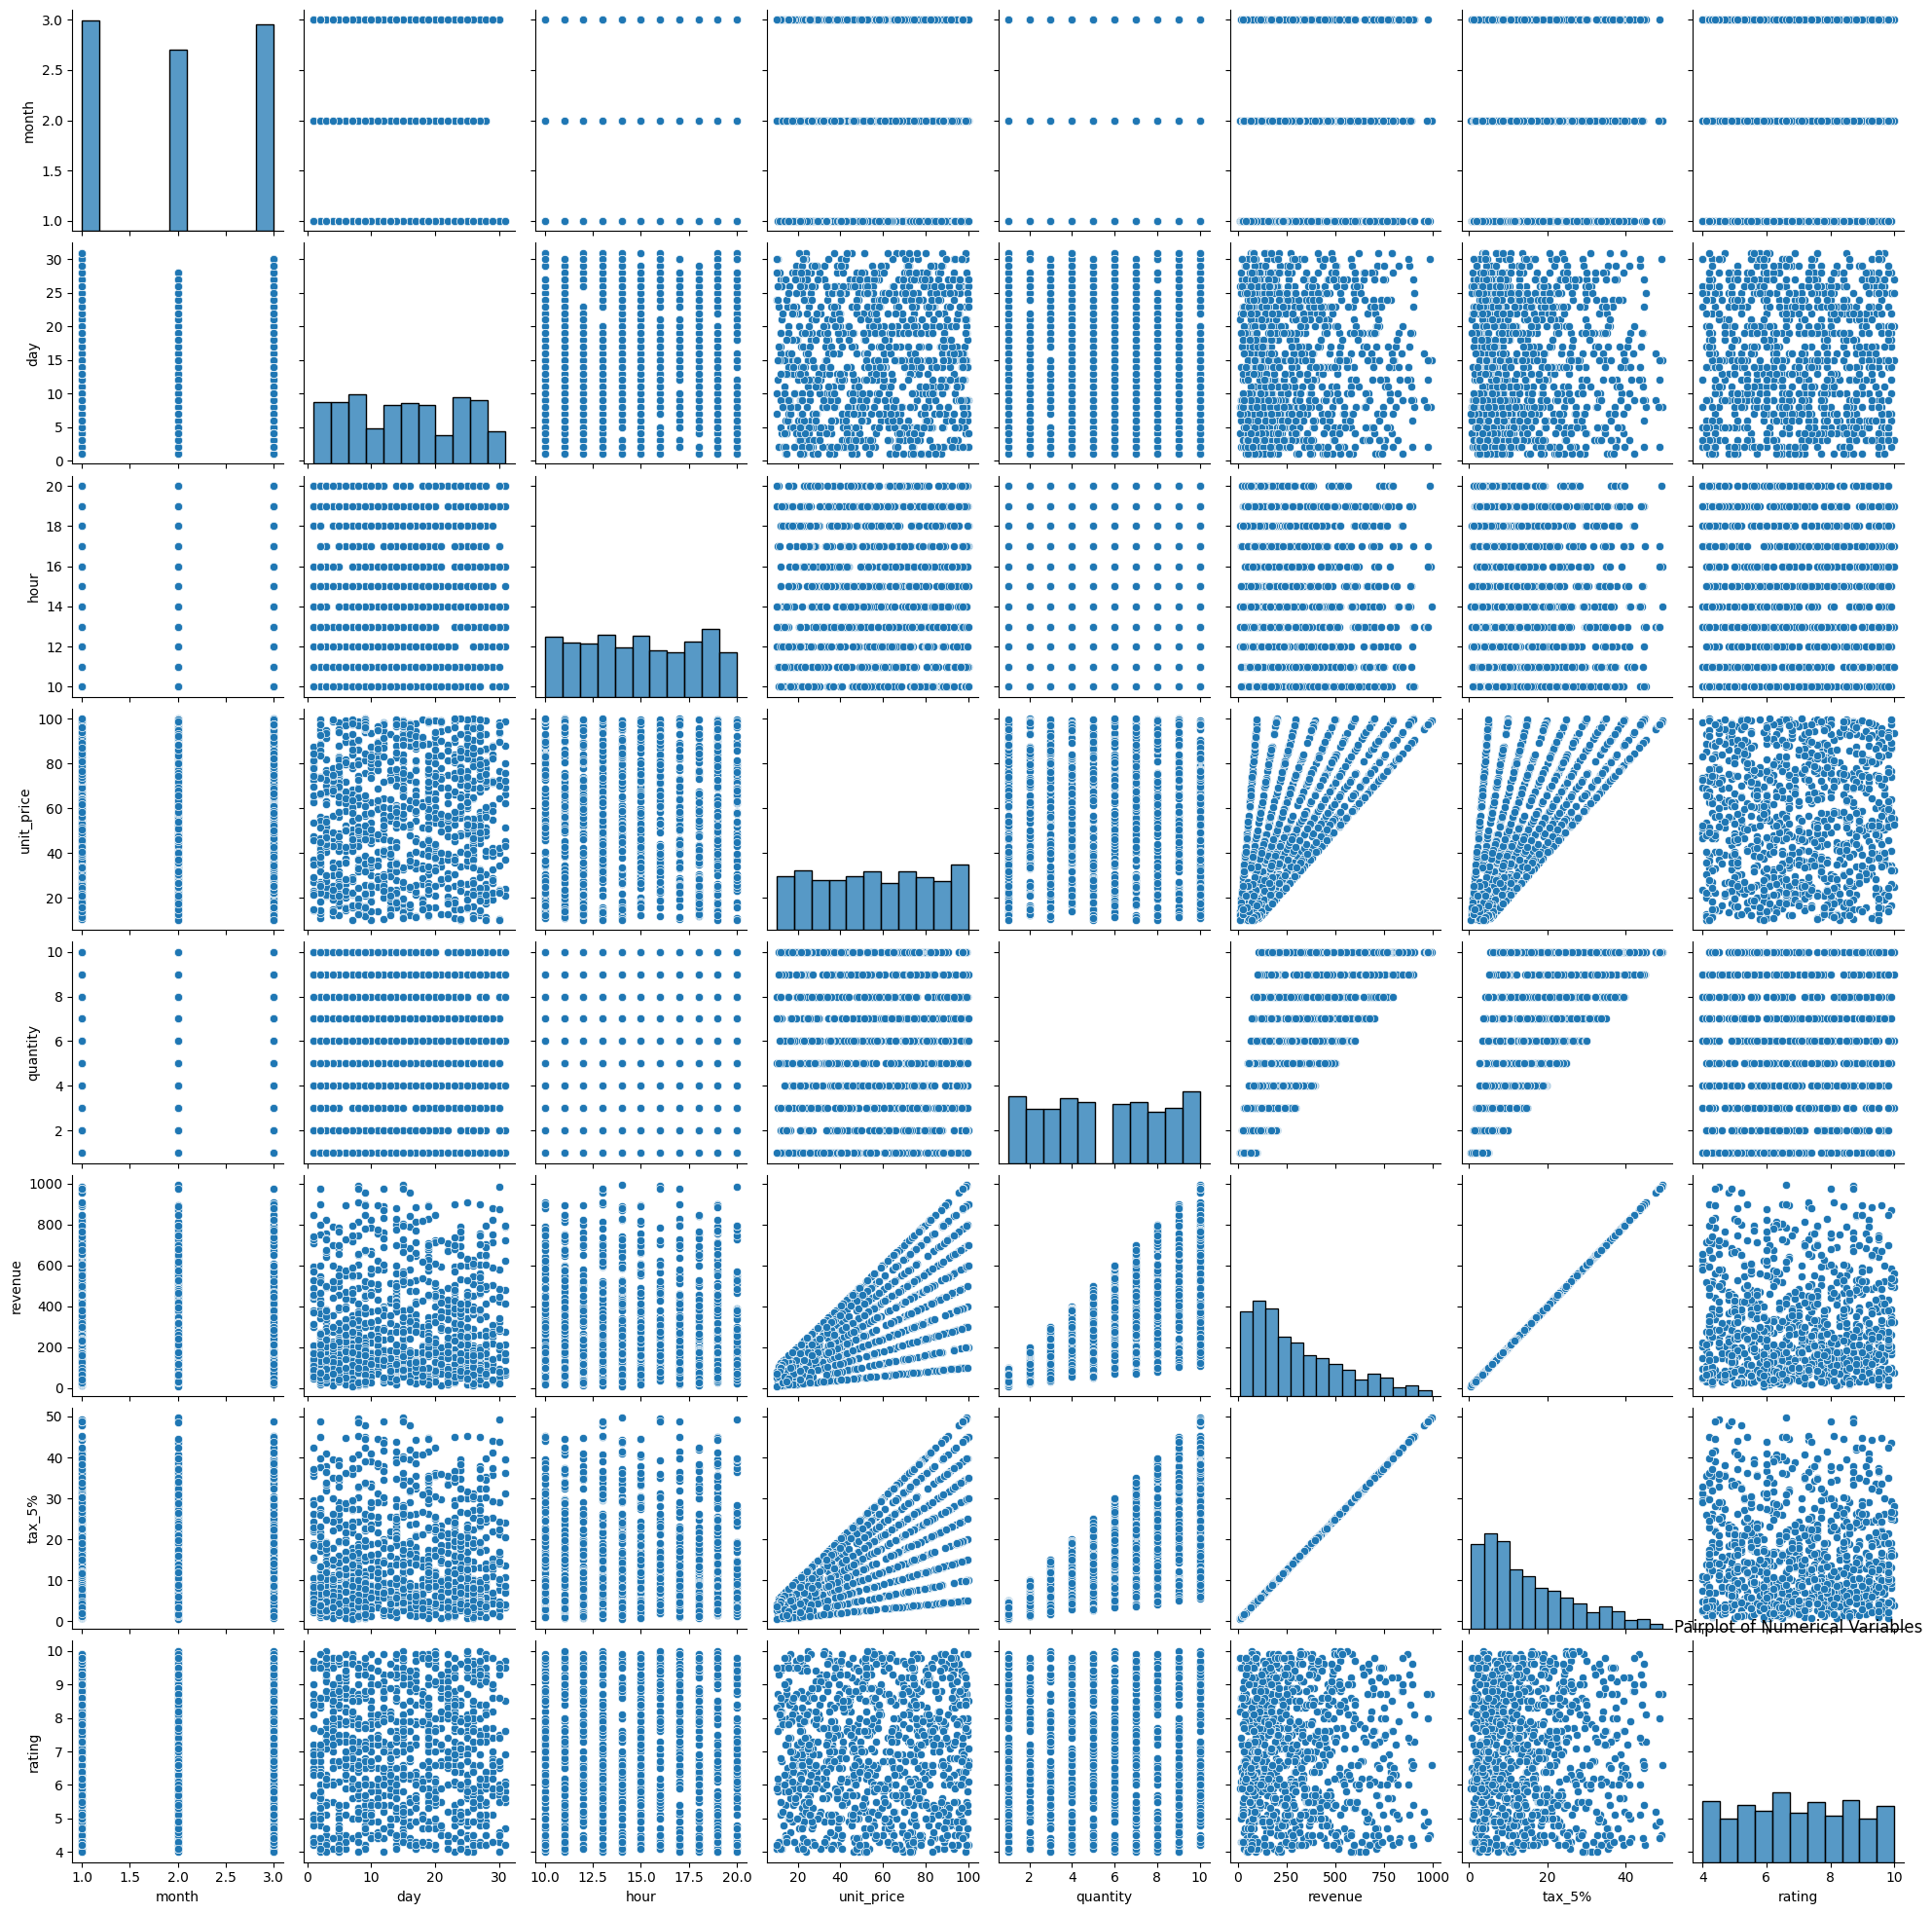

In [31]:
sns.pairplot(df[num_attribs])
plt.title('Pairplot of Numerical Variables')
plt.show()

In [32]:
def plot_distribution_curves(df, columns, hue_column):
    """
    Plot distribution curves for each column in the DataFrame
    with respect to the specified hue column using different colors.

    Parameters:
        df (pandas.DataFrame): DataFrame containing the data.
        columns (list): List of columns to plot.
        hue_column (str): Column to use for coloring the distribution curves.

    Returns:
        None
    """
    colors = sns.color_palette("husl", len(df[hue_column].unique()))
    
    num_plots = len(columns)
    fig, axes = plt.subplots(nrows=2, ncols=num_plots // 2, figsize=(15, 10))
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

    for i, col in enumerate(columns):
        for j, value in enumerate(df[hue_column].unique()):
            sns.kdeplot(data=df[df[hue_column] == value], x=col, color=colors[j], ax=axes[i])
        axes[i].set_title(f"Distribution of {col} by {hue_column}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Density')
        axes[i].legend(df[hue_column].unique(), title=hue_column)

    plt.tight_layout()
    plt.show()

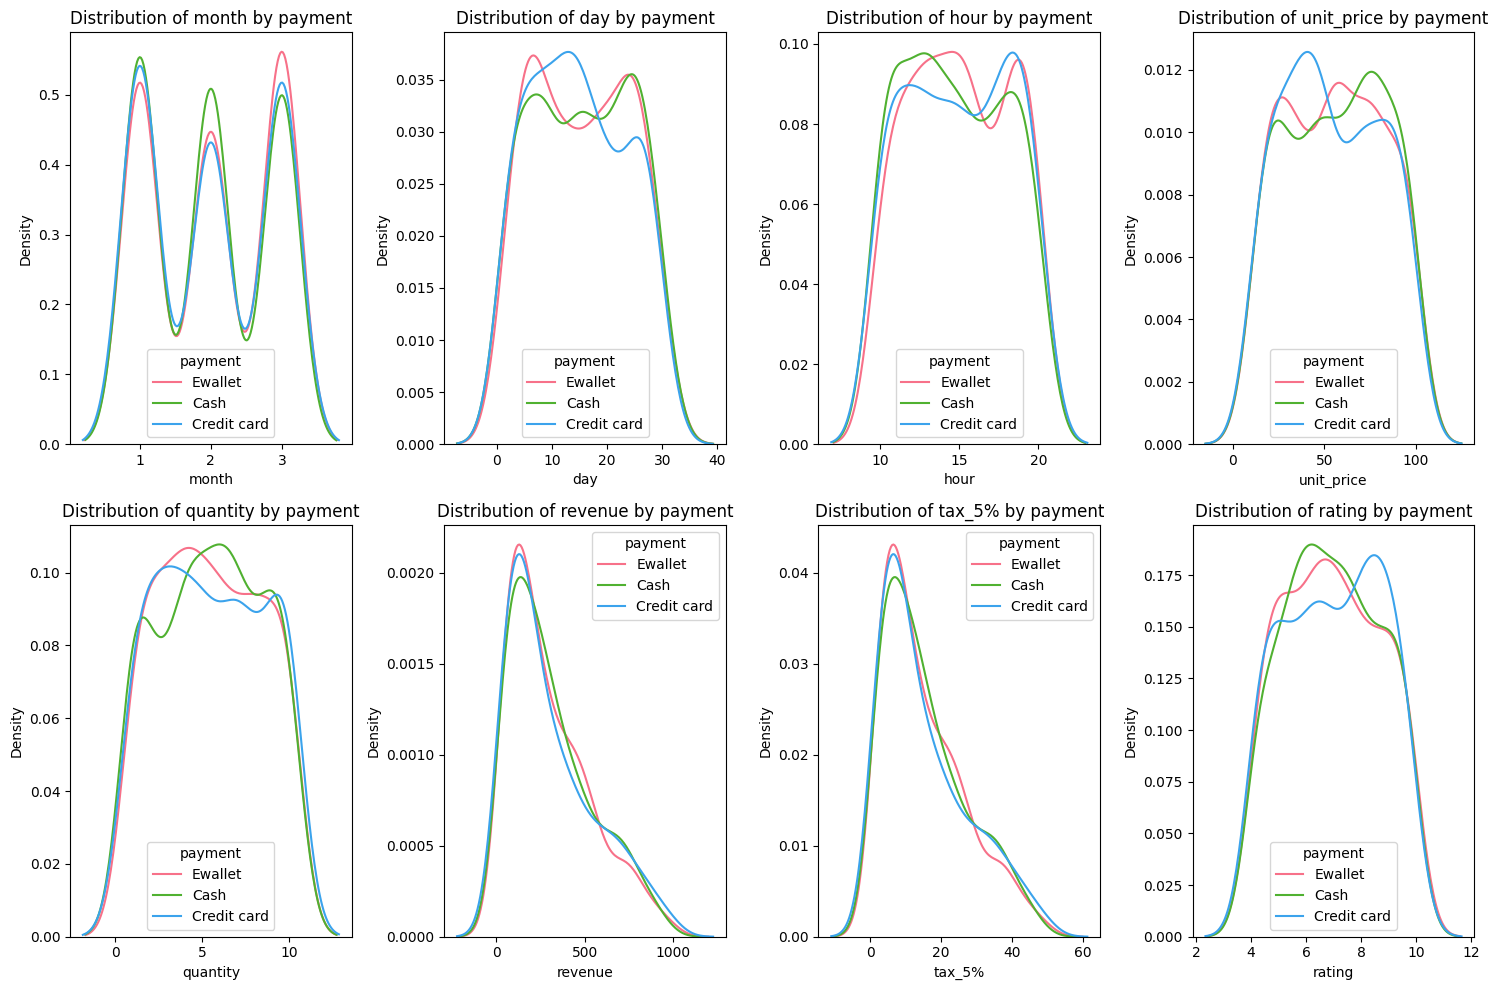

In [33]:
plot_distribution_curves(df, num_attribs, 'payment')

## **5.3 Multivariate**

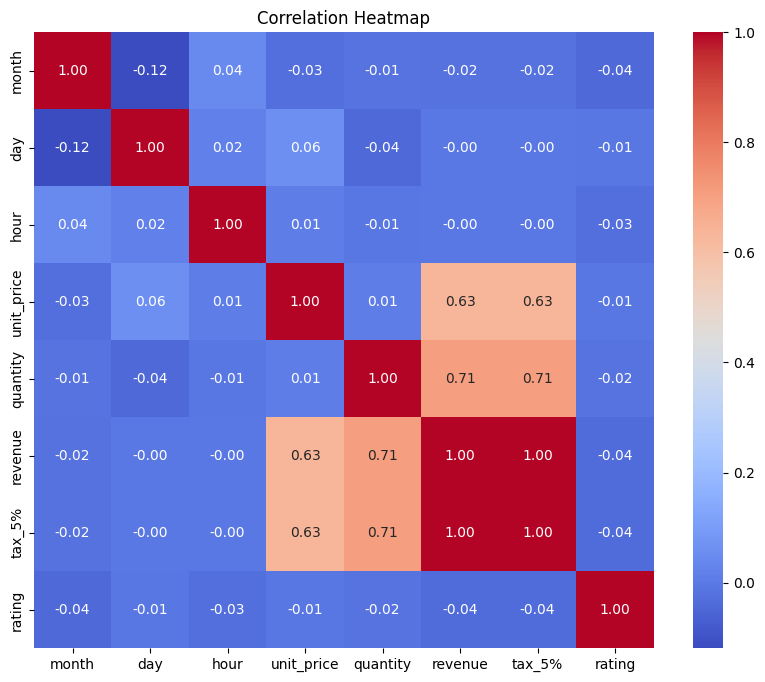

In [34]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_attribs].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<h1 style="color:red;"><strong> 6. Labels Cleaning (Optionals)</h1>

* Drop null labels
* Drop outlier labels

{'whiskers': [<matplotlib.lines.Line2D at 0x1218c9cb920>,
 'caps': [<matplotlib.lines.Line2D at 0x1218c9cbe90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1218c9cb7a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1218ca04380>],
 'fliers': [<matplotlib.lines.Line2D at 0x1218ca04620>],
 'means': []}

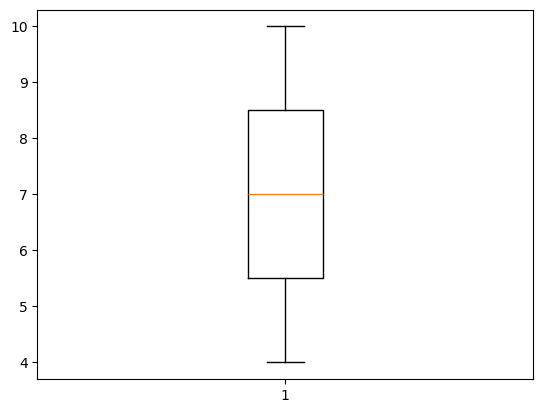

In [35]:
plt.boxplot(df['rating'])

<h1 style="color:red;"><strong> 7. Split Train Test For Modelling </h1>

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
df.drop(columns = 'tax_5%', inplace = True)

In [38]:
df[bin_attribs]

,customer_type,gender,year
0,Member,Female,2019
1,Normal,Female,2019
2,Normal,Male,2019
3,Member,Male,2019
4,Normal,Male,2019
...,...,...,...
995,Normal,Male,2019
996,Normal,Female,2019
997,Member,Male,2019
998,Normal,Male,2019


In [39]:
# Replace 'Male' with 1 and 'Female' with 0
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
df['customer_type'] = df['gender'].replace({'Member': 1, 'Normal': 0})

C:\Users\PHUONG UYEN\AppData\Local\Temp\ipykernel_10228\216286378.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})


In [40]:
target = "rating"

In [41]:
num_attribs.remove(target)

In [42]:
num_attribs.remove('tax_5%')

In [43]:
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

train = train_set.drop(target, axis=1)
train_labels = train_set[[target]]

train_num = train[num_attribs+bin_attribs]
train_cat = train[cat_attribs]


test = test_set.drop(target, axis=1)
test_labels = test_set[[target]]

<h1 style="color:red;"><strong> 8. Data Cleaning for Modelling </h1>

In [44]:
train_set.isnull().sum()

invoice_id       0
branch           0
city             0
customer_type    0
gender           0
product_line     0
payment          0
date             0
time             0
datetime         0
year             0
month            0
day              0
hour             0
unit_price       0
quantity         0
revenue          0
rating           0
dtype: int64

In [45]:
# # Count null values in each column
# null_counts = train_set.isnull().sum()

# # Filter columns with more than zero null values
# null_counts_gt_zero = null_counts[null_counts > 0]

# # Plotting the null counts
# plt.figure(figsize=(10, 6))
# null_counts_gt_zero.plot(kind='bar', color='skyblue')
# plt.title('Count of Null Values in DataFrame Columns (Columns with >0 Nulls)')
# plt.xlabel('Columns')
# plt.ylabel('Count of Null Values')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
# plt.tight_layout()  # Adjust layout to prevent clipping of labels
# plt.show()

## **8.1 Handle Nulls**

### 8.1.1 Types of NULLS

**Missing Completely at Random (MCAR)**
- Missing data is random
- Data was lost in ETL, someone was interrupted when completing a survey
- Remove or impute

**Missing at Random (MAR)**
- Missing data suggests something about something else observed
- Older (which we have in data) may have higher privacy concerns and not report income
- Remove or impute

**Missing Not at Random (MNAR)**
- Missing based on something not observed
- Self-selection bias: Depressed do not complete mental health surveys
- Advanced econometrics

**By Design:**
- Remove credit card data if birthdate is below a certain value

### 8.1.2 Solutions to handle Nulls 
- Get rid of the corresponding rows.
- Get rid of the whole attribute.
- Set the values to some value (zero, the mean, the median, etc.).
- Create a new column that have True for the non-null and False for null (or the opposite)

In [46]:
# df.dropna(subset=["minimum_payments"]) # option 1
# df.drop("minimum_payments", axis=1) # option 2
# median = df["minimum_payments"].median() # option 3
# df["minimum_payments"].fillna(median, inplace=True) # option 4
# 

In [47]:
from sklearn.impute import SimpleImputer

In [48]:
train_imputer = SimpleImputer(strategy="median")
train_labels_imputer = SimpleImputer(strategy="median")

Fit train (non_labels)

In [49]:
train_num

,month,day,hour,unit_price,quantity,revenue,customer_type,gender,year
541,1,3,10,75.88,1,75.88,1,1,2019
440,1,15,19,17.44,5,87.20,1,1,2019
482,1,8,13,37.14,5,185.70,1,1,2019
422,2,8,13,97.21,10,972.10,0,0,2019
778,3,20,17,25.25,5,126.25,1,1,2019
...,...,...,...,...,...,...,...,...,...
106,1,5,20,27.38,6,164.28,1,1,2019
270,3,6,18,67.43,5,337.15,0,0,2019
860,2,20,13,86.27,1,86.27,0,0,2019
435,3,19,19,99.24,9,893.16,1,1,2019


In [50]:
train_imputer.fit(train_num)

SimpleImputer(strategy='median')

In [51]:
train_num.isnull().sum().sum()

0

In [52]:
train_imputer.statistics_


array([2.00000e+00, 1.50000e+01, 1.50000e+01, 5.45600e+01, 6.00000e+00,
       2.43015e+02, 0.00000e+00, 0.00000e+00, 2.01900e+03])

In [53]:
train_num.median().values

array([2.00000e+00, 1.50000e+01, 1.50000e+01, 5.45600e+01, 6.00000e+00,
       2.43015e+02, 0.00000e+00, 0.00000e+00, 2.01900e+03])

In [54]:
X = train_imputer.transform(train_num) # return Numpy value

In [55]:
train_num =  pd.DataFrame(X, columns=train_num.columns)


In [56]:
train_num.isnull().sum().sum()

0

Fit Labels

In [70]:
train_labels_imputer.fit(train_labels)

SimpleImputer(strategy='median')

In [58]:
train_labels_imputer.statistics_


array([7.])

In [59]:
train_labels.isnull().sum()

rating    0
dtype: int64

In [60]:
Y = train_labels_imputer.transform(train_labels) # return Numpy value

In [61]:
train_labels =  pd.DataFrame(Y, columns=train_labels.columns)


## **8.2 Handle Outliers**

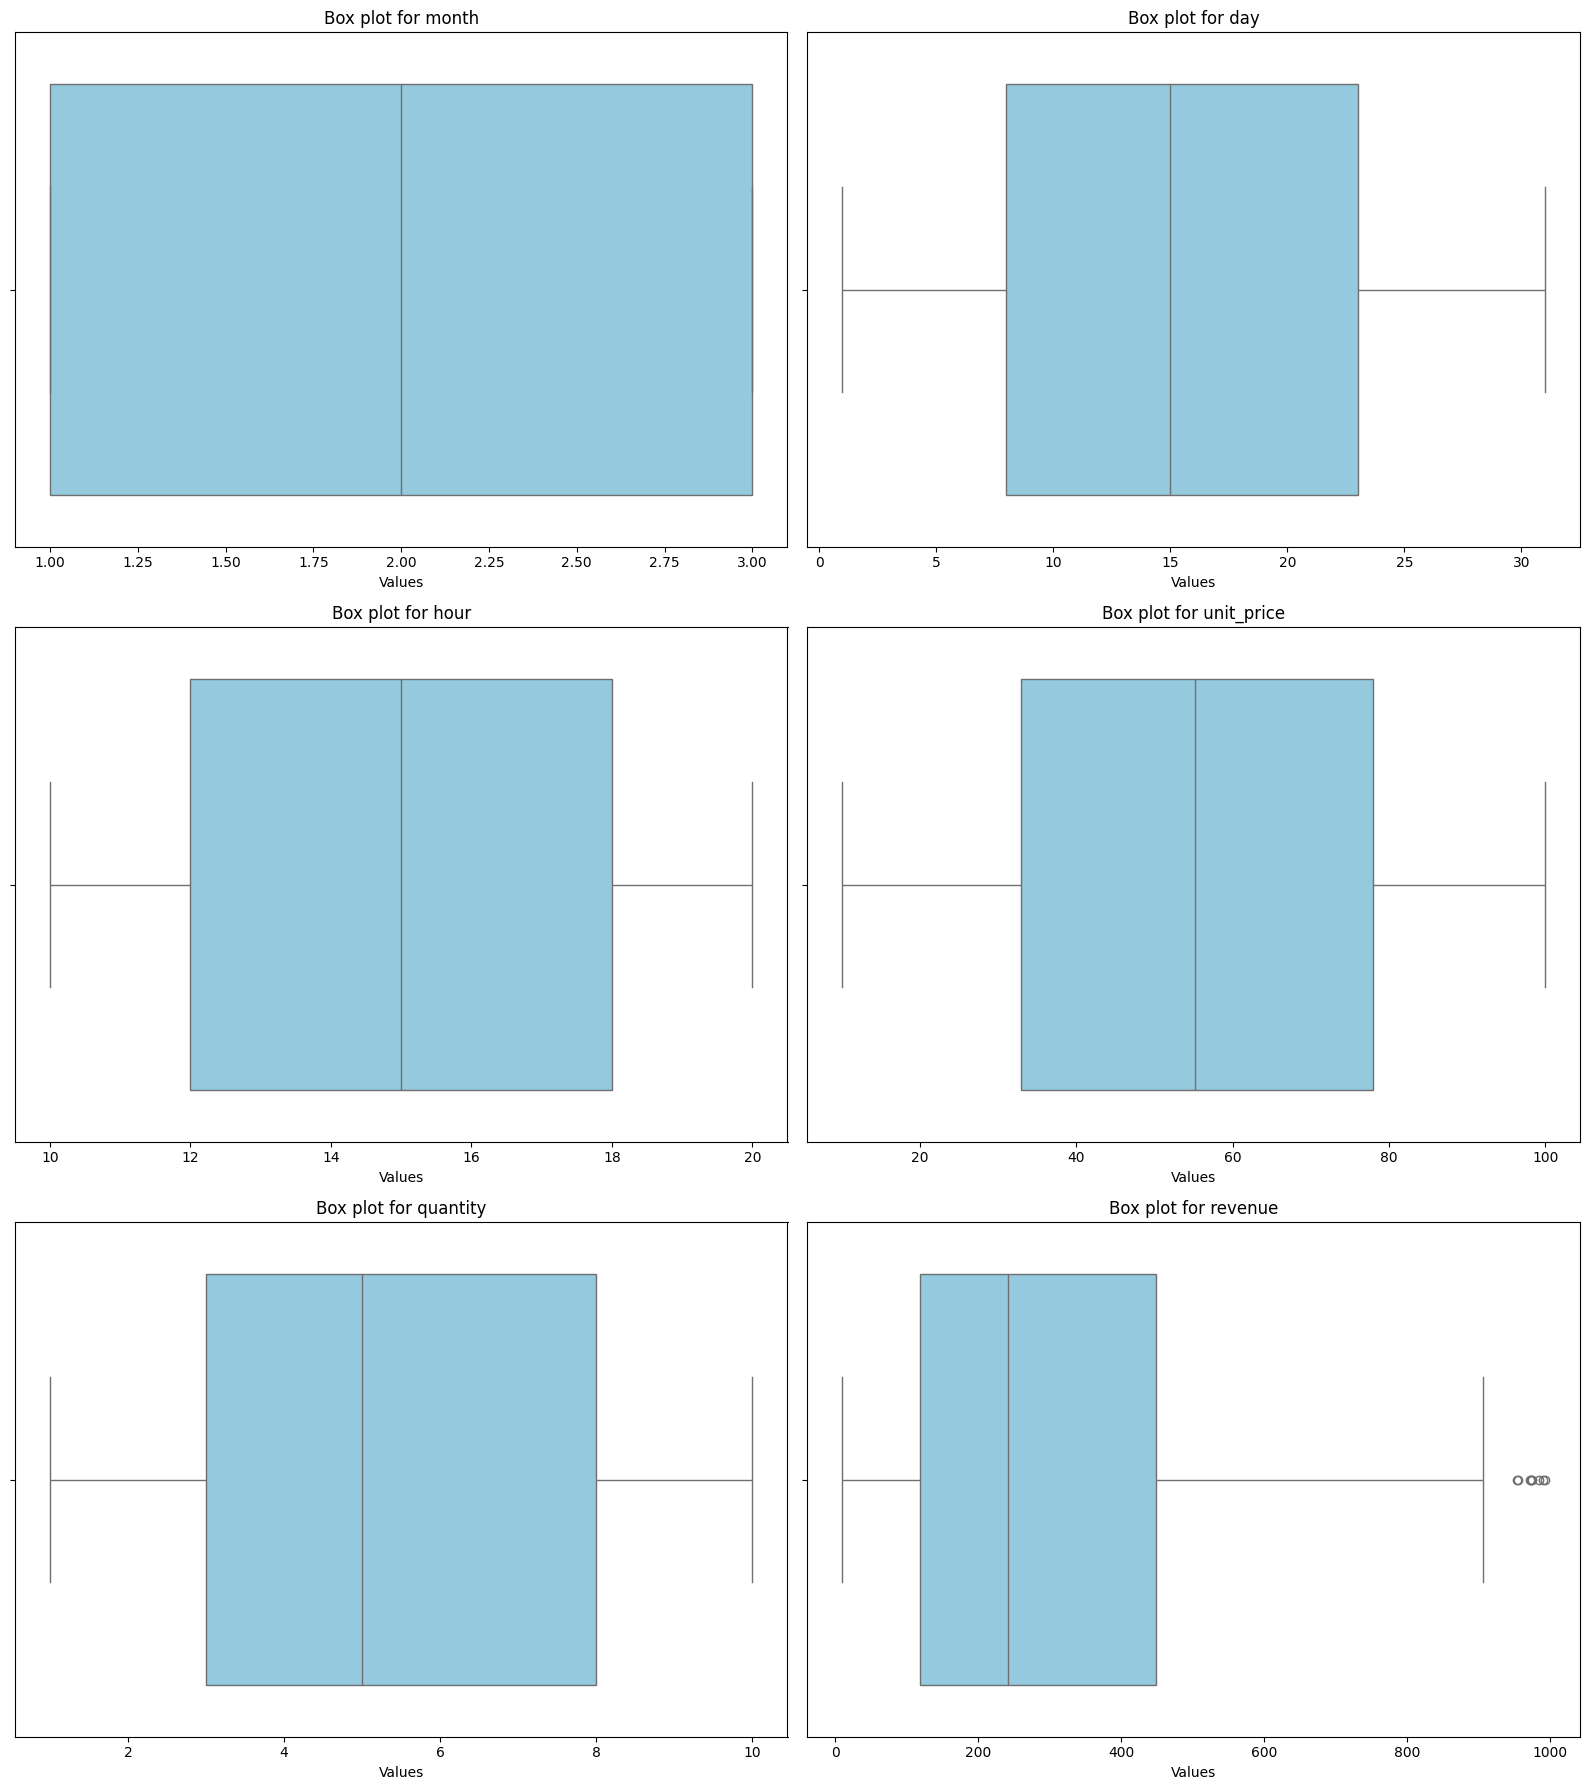

In [62]:
num_rows = 3
num_cols = len(num_attribs) // num_rows + (len(num_attribs) % num_rows > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))
axes = axes.ravel()  # Flatten the axes array

for i, col in enumerate(num_attribs):
    ax = axes[i]
    sns.boxplot(x=df[col], ax=ax, color='skyblue')  # Use seaborn's boxplot function
    ax.set_title(f'Box plot for {col}')
    ax.set_xlabel('Values')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [63]:
# Remove Outlier
def remove_outliers(df, column_names=None):
    """
    Remove outliers from specific columns in the DataFrame based on the interquartile range (IQR) method,
    or remove outliers from all numerical columns if column_names is None.

    Parameters:
    - df: DataFrame
        The DataFrame containing the data.
    - column_names: list or None, default None
        The list of column names for which outliers are to be removed,
        or None to remove outliers from all numerical columns.

    Returns:
    - df_filtered: DataFrame
        The DataFrame with outliers removed.
    """
    if column_names is None:
        num_attribs = df.select_dtypes(include='number').columns
    else:
        num_attribs = column_names

    total_removed = 0
    total_rows = len(df)

    for col in num_attribs:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers from the specified column
        removed_rows = len(df) - len(df[(df[col] >= lower_bound) & (df[col] <= upper_bound)])
        total_removed += removed_rows

        # Update DataFrame
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

        # Print the number and percentage of removed values if any rows have been removed
        percentage_removed = (removed_rows / total_rows) * 100
        print(f"Removed {removed_rows} rows ({percentage_removed:.2f}%) due to outliers in column '{col}'.")

    return df

In [64]:
# We are not handling any outlier in this case to see how the model perform

<h1 style="color:red;"><strong> 9.Preprocess Data for Modelling </h1>

## **9.1 Handle Categorical Data**

In [65]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

### 9.1.1 Ordinal Encoding

In [66]:
train_cat.drop(columns= ['customer_type',	'gender'], inplace = True)

C:\Users\PHUONG UYEN\AppData\Local\Temp\ipykernel_10228\697476318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cat.drop(columns= ['customer_type',	'gender'], inplace = True)


In [67]:
train_cat

,branch,city,product_line,payment
541,C,Naypyitaw,Health and beauty,Credit card
440,C,Naypyitaw,Food and beverages,Cash
482,A,Yangon,Sports and travel,Ewallet
422,C,Naypyitaw,Fashion accessories,Credit card
778,C,Naypyitaw,Sports and travel,Cash
...,...,...,...,...
106,C,Naypyitaw,Fashion accessories,Credit card
270,B,Mandalay,Sports and travel,Ewallet
860,C,Naypyitaw,Home and lifestyle,Ewallet
435,C,Naypyitaw,Sports and travel,Ewallet


In [69]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(train_cat[cat_attribs])
housing_cat_encoded[:10]


KeyError: "['customer_type', 'gender'] not in index"

In [ ]:
ordinal_encoder.categories_


[array(['A', 'B', 'C'], dtype=object),
 array(['Mandalay', 'Naypyitaw', 'Yangon'], dtype=object),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array(['Electronic accessories', 'Fashion accessories',
        'Food and beverages', 'Health and beauty', 'Home and lifestyle',
        'Sports and travel'], dtype=object),
 array(['Cash', 'Credit card', 'Ewallet'], dtype=object)]

### 9.1.2 One Hot Encoding

In [ ]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(train_cat[cat_attribs])
housing_cat_1hot

<700x19 sparse matrix of type '<class 'numpy.float64'>'
	with 4200 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_1hot.toarray()

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [ ]:
cat_encoder.categories_


[array(['A', 'B', 'C'], dtype=object),
 array(['Mandalay', 'Naypyitaw', 'Yangon'], dtype=object),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array(['Electronic accessories', 'Fashion accessories',
        'Food and beverages', 'Health and beauty', 'Home and lifestyle',
        'Sports and travel'], dtype=object),
 array(['Cash', 'Credit card', 'Ewallet'], dtype=object)]

## **9.2 Feature Scaling**
* As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and new data).

### 9.2.1 Min-Max Scailing (Normalization Scailing)
* Values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min
* Normalization are more affected by outliers

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
def minmax_scale_dataframe(df, columns_to_scale=None):
    """
    Scale the specified columns in the DataFrame using Min-Max scaling.
    
    Parameters:
        df (pandas.DataFrame): DataFrame to be scaled.
        columns_to_scale (list): List of columns to be scaled. If None, scale all numerical columns.
        
    Returns:
        pandas.DataFrame: Scaled DataFrame.
    """
    scaler = MinMaxScaler()
    if columns_to_scale is None:
        columns_to_scale = df.select_dtypes(include=['number']).columns.tolist()
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])
    return df_scaled

### 9.2.2 Standardization Scailing 
* First it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance
*  Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1)
* standardization is much less affected by outliers.

In [ ]:
def standard_scale_dataframe(df, columns_to_scale=None):
    """
    Scale the specified columns in the DataFrame using standard scaling.
    
    Parameters:
        df (pandas.DataFrame): DataFrame to be scaled.
        columns_to_scale (list): List of columns to be scaled. If None, scale all numerical columns.
        
    Returns:
        pandas.DataFrame: Scaled DataFrame.
    """
    scaler = StandardScaler()
    if columns_to_scale is None:
        columns_to_scale = df.select_dtypes(include=['number']).columns.tolist()
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])
    return df_scaled

## **9.3 Transformation Pipelines**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
train_set.head()

,invoice_id,branch,city,customer_type,gender,product_line,payment,date,time,datetime,year,month,day,hour,unit_price,quantity,revenue,rating
541,343-87-0864,C,Naypyitaw,1,1,Health and beauty,Credit card,1/3/2019,10:30:00,2019-01-03 10:30:00,2019,1,3,10,75.88,1,75.88,7.1
440,450-28-2866,C,Naypyitaw,1,1,Food and beverages,Cash,1/15/2019,19:25:00,2019-01-15 19:25:00,2019,1,15,19,17.44,5,87.20,8.1
482,674-15-9296,A,Yangon,1,1,Sports and travel,Ewallet,1/8/2019,13:05:00,2019-01-08 13:05:00,2019,1,8,13,37.14,5,185.70,5.0
422,271-88-8734,C,Naypyitaw,0,0,Fashion accessories,Credit card,2/8/2019,13:00:00,2019-02-08 13:00:00,2019,2,8,13,97.21,10,972.10,8.7
778,102-06-2002,C,Naypyitaw,1,1,Sports and travel,Cash,3/20/2019,17:52:00,2019-03-20 17:52:00,2019,3,20,17,25.25,5,126.25,6.1


In [ ]:
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', StandardScaler()),
 ])
# housing_num_tr = num_pipeline.fit_transform(train_num)

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs+bin_attribs),
 ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
 ])
train_prepared = full_pipeline.fit_transform(train)


In [ ]:
train_prepared

array([[-1.18409855, -1.40294171, -1.52723526, ...,  0.        ,
         1.        ,  0.        ],
       [-1.18409855, -0.01487217,  1.26892345, ...,  1.        ,
         0.        ,  0.        ],
       [-1.18409855, -0.8245794 , -0.59518235, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.013689  ,  0.56349013, -0.59518235, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.21147655,  0.44781767,  1.26892345, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.013689  , -1.63428663, -1.21655096, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
train_labels_imputer.fit(train_labels.values.reshape(-1, 1))

SimpleImputer(strategy='median')

In [ ]:
Y = train_labels_imputer.transform(train_labels.values.reshape(-1, 1))

In [ ]:
train_labels =  pd.DataFrame(Y, columns=train_labels.columns)

<h1 style="color:red;"><strong> 10. Select and Train a Model </h1>

## **10.1 Training and Evaluating on the Training Set**

### 10.1.1 Model 1: Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)

LinearRegression()

In [ ]:
train_labels.iloc[:5]

,rating
0,7.1
1,8.1
2,5.0
3,8.7
4,6.1


In [ ]:
some_data = train.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", np.array(some_labels))

Predictions: [[7.5625  ]
 [7.296875]
 [7.140625]
 [6.78125 ]
 [6.609375]]
Labels: [[7.1]
 [8.1]
 [5. ]
 [8.7]
 [6.1]]


In [ ]:
from sklearn.metrics import mean_squared_error
lin_predictions = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(np.array(train_labels), lin_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.6925929223476182

In [ ]:
# Compute residuals
residuals = np.array(train_labels) - lin_predictions

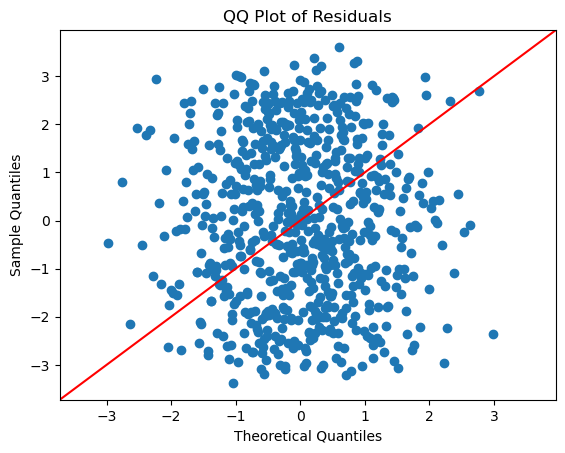

In [ ]:
import statsmodels.api as sm

# Plot QQ plot
sm.qqplot(residuals, line = '45')
plt.title('QQ Plot of Residuals')
plt.show()

### 10.1.2 Model 2: Decision Tree Regressor Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_prepared, train_labels)

DecisionTreeRegressor()

In [ ]:
tree_predictions = tree_reg.predict(train_prepared)
tree_mse = mean_squared_error(train_labels, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


0.0

### 10.1.3 Model 3: Forest Regressor Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest_reg = RandomForestRegressor()
forest_reg.fit(train_prepared, train_labels)


c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
tree_predictions = forest_reg.predict(train_prepared)
forest_mse = mean_squared_error(train_labels, tree_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

0.6530792841826877


Potentially Saving the model for future usage

In [ ]:
import joblib

In [ ]:
# # Save the trained model to a file
# joblib.dump(forest_reg, "forest_reg.pkl")

# # Later, when you want to use the model again
# # Load the model from the file
# forest_reg = joblib.load("forest_reg.pkl")

Could this model really be absolutely perfect? Of course,
it is much more likely that the model has badly overfit the data. How can you be sure?
As we saw earlier, you don’t want to touch the test set until you are ready to launch a
model you are confident about, so you need to use part of the training set for train‐
ing, and part for model validation

## **10.2 Better Evaluation Using Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
scores = cross_val_score(tree_reg, train_prepared, train_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)


Scores: [2.24620315 2.6636173  2.12555875 2.35572252 2.12713758 2.2184937
 1.98530314 2.49499499 2.3373367  2.38588109]
Mean: 2.2940248917700052
Standard deviation: 0.18725405644178267


In [ ]:
lin_scores = cross_val_score(lin_reg, train_prepared, train_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [1.56980276 1.70879783 1.91823421 1.86370509 1.66271891 1.83388055
 1.68288431 1.78717055 1.719782   1.68671287]
Mean: 1.7433689074764593
Standard deviation: 0.10020929777821683


In [ ]:
forest_scores = cross_val_score(forest_reg, train_prepared, train_labels,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)


c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Scores: [1.57623271 1.82421275 1.85705298 1.76024912 1.69817342 1.78063642
 1.72327551 1.79788318 1.63711753 1.7863811 ]
Mean: 1.7441214724931478
Standard deviation: 0.08223140199491599


The score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set. The solution include:
* Simplify the model
* Constrain it (i.e., regularize it)
* Get a lot more training data

Try others ML models, the goal is to shortlist 2-5 promising models

<h1 style="color:red;"><strong> 11. Fine Tune Your Model </h1>

## **11.1 Grid Search**
One way to do that would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. This would be very tedious work, and you may not have time to explore many combinations.


Instead you should get Scikit-Learn’s GridSearchCV to search for you. All you need to do is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
 {'n_estimators': [5, 25, 50], 'max_features': [5, 10, 15, 25]},
 {'bootstrap': [False], 'n_estimators': [5, 10], 'max_features': [5, 10, 15]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(train_prepared, train_labels)


c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [5, 10, 15, 25],
                          'n_estimators': [5, 25, 50]},
                         {'bootstrap': [False], 'max_features': [5, 10, 15],
                          'n_estimators': [5, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(train_prepared, train_labels)


c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [5, 10, 15, 25],
                          'n_estimators': [5, 25, 50]},
                         {'bootstrap': [False], 'max_features': [5, 10, 15],
                          'n_estimators': [5, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict. It will then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to False instead of True (which is the default value for this hyperparameter)

In [ ]:
grid_search.best_params_


{'max_features': 15, 'n_estimators': 25}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=15, n_estimators=25)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


1.8979998494655967 {'max_features': 5, 'n_estimators': 5}
1.7565228574007878 {'max_features': 5, 'n_estimators': 25}
1.737543338000112 {'max_features': 5, 'n_estimators': 50}
1.8182797207407726 {'max_features': 10, 'n_estimators': 5}
1.7570323681870927 {'max_features': 10, 'n_estimators': 25}
1.735541802599819 {'max_features': 10, 'n_estimators': 50}
1.873265445304383 {'max_features': 15, 'n_estimators': 5}
1.7277435854729306 {'max_features': 15, 'n_estimators': 25}
1.7410059686448933 {'max_features': 15, 'n_estimators': 50}
1.8637315870509439 {'max_features': 25, 'n_estimators': 5}
1.7573328752076864 {'max_features': 25, 'n_estimators': 25}
1.7392315528088014 {'max_features': 25, 'n_estimators': 50}
1.899995338340146 {'bootstrap': False, 'max_features': 5, 'n_estimators': 5}
1.8434048078797793 {'bootstrap': False, 'max_features': 5, 'n_estimators': 10}
1.8970506431977885 {'bootstrap': False, 'max_features': 10, 'n_estimators': 5}
1.8088788951012882 {'bootstrap': False, 'max_features':

Non of the fine tune model are as good as the orininal one

## **11.2 Randomized Search**
Better when the hyperparameter space is large. This approach is the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits:
* If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).
* You have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations


## **11.3 Ensemble Methods**
Another way to fine-tune your system is to try to combine the models that perform best. The group (or “ensemble”) will often perform better than the best individual model (just like Random Forests perform better than the individual Decision Trees they rely on), especially if the individual models make very different types of errors.

<h1 style="color:red;"><strong>   12. Analyze Model and Explain Features important </h1>

## **12.1 Grid Search Feature Importance**

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.04431086, 0.15037543, 0.09516094, 0.18537413, 0.0663444 ,
       0.20208773, 0.00706013, 0.0081535 , 0.        , 0.0127718 ,
       0.01261336, 0.01146552, 0.01106789, 0.01134054, 0.01141171,
       0.00800323, 0.00624973, 0.00794767, 0.00785237, 0.01260682,
       0.01478756, 0.01568127, 0.01125971, 0.01533666, 0.01478354,
       0.01544174, 0.01795457, 0.02255718])

## **12.2 Lime**

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
explainer = LimeTabularExplainer(train_prepared, 
                                 mode = 'regression')

## **12.3 Shapley**

<h1 style="color:red;"><strong>   13 Evaluate Your System on the Test Set </h1>

Now is the time to evaluate the final model on the test set. There is nothing special about this process; just get the predictors and the labels from your test set, run your full_pipeline to transform the data (call `transform`, not `fit_transform()`, you do not want to fit the test set!), and evaluate the final model on the test set:


In [ ]:
final_model = forest_reg

In [ ]:
test_set

,invoice_id,branch,city,customer_type,gender,product_line,payment,date,time,datetime,year,month,day,hour,unit_price,quantity,revenue,rating
521,451-28-5717,C,Naypyitaw,0,0,Home and lifestyle,Cash,3/20/2019,11:23:00,2019-03-20 11:23:00,2019,3,20,11,83.17,6,499.02,7.3
737,137-63-5492,C,Naypyitaw,1,1,Electronic accessories,Ewallet,1/29/2019,14:26:00,2019-01-29 14:26:00,2019,1,29,14,58.76,10,587.60,9.0
740,733-29-1227,C,Naypyitaw,1,1,Home and lifestyle,Cash,3/23/2019,12:41:00,2019-03-23 12:41:00,2019,3,23,12,55.61,7,389.27,8.5
660,322-02-2271,B,Mandalay,0,0,Sports and travel,Cash,2/3/2019,11:46:00,2019-02-03 11:46:00,2019,2,3,11,42.97,3,128.91,9.3
411,569-71-4390,B,Mandalay,1,1,Sports and travel,Ewallet,1/25/2019,14:29:00,2019-01-25 14:29:00,2019,1,25,14,21.87,2,43.74,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,746-19-0921,C,Naypyitaw,1,1,Food and beverages,Ewallet,2/9/2019,10:02:00,2019-02-09 10:02:00,2019,2,9,10,21.58,1,21.58,7.2
935,235-06-8510,C,Naypyitaw,1,1,Home and lifestyle,Ewallet,1/24/2019,20:59:00,2019-01-24 20:59:00,2019,1,24,20,85.72,3,257.16,5.1
428,741-73-3559,B,Mandalay,1,1,Sports and travel,Cash,2/27/2019,17:27:00,2019-02-27 17:27:00,2019,2,27,17,67.27,5,336.35,6.9
7,315-22-5665,C,Naypyitaw,0,0,Home and lifestyle,Ewallet,2/24/2019,11:38:00,2019-02-24 11:38:00,2019,2,24,11,73.56,10,735.60,8.0


In [ ]:
test = test_set.drop("", axis=1)
test_labels = test_set["price"].copy()

test_prepared = full_pipeline.transform(test)
test_labels = train_labels_imputer.transform(test_labels.values.reshape(-1, 1))

final_model.fit(test_prepared, test_labels)
final_predictions = final_model .predict(test_prepared)
final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
print(final_rmse)